# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [141]:
sinasc_raw = pd.read_csv('sinasc_ro_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [142]:
sinasc = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI', 'munResNome', 'QTDFILVIVO',
]].copy()

In [143]:
sinasc.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [144]:
pesomed08001 = sinasc[sinasc['DTNASC'] == '2019-01-08'].groupby(['SEXO', 'ESCMAE'])['PESO'].mean()
df_pesos = pd.DataFrame(pesomed08001)

df_pesos

PESO
SEXO      ESCMAE                      
Feminino  1 a 3 anos       2800.000000
          12 anos ou mais  3421.111111
          4 a 7 anos       2784.285714
          8 a 11 anos      3190.655172
Masculino 12 anos ou mais  3259.000000
          4 a 7 anos       3380.000000
          8 a 11 anos      3332.880000

In [145]:
fem = sinasc[(sinasc['SEXO'] == 'Feminino') & (sinasc['DTNASC'] == '2019-01-08')].groupby('ESCMAE')['PESO'].count()


In [146]:
masc = sinasc[(sinasc['SEXO'] == 'Masculino') & (sinasc['DTNASC'] == '2019-01-08')].groupby('ESCMAE')['PESO'].count()


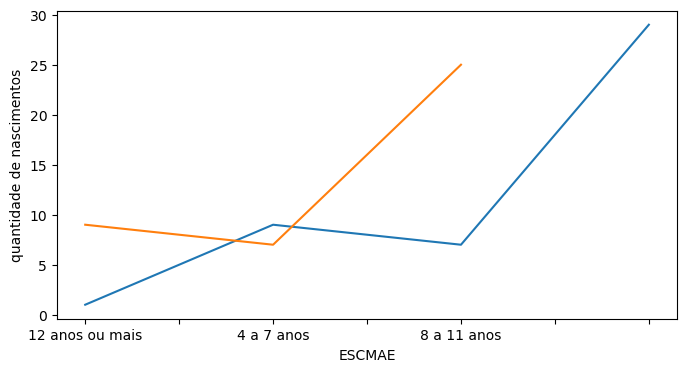

In [147]:
fem.plot(figsize=[8,4])
masc.plot()
plt.ylabel('quantidade de nascimentos');

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [148]:
sinasc.value_counts().sum()

7072

In [149]:
erro_municipio_ignorado = sinasc.loc[sinasc['munResNome'] == 'Município ignorado - RO', 'munResNome'].iloc[0]
sinasc = sinasc[sinasc['munResNome'] != erro_municipio_ignorado]

# Descobrindo a cidade com menos nascimentos
menosbebes = sinasc['munResNome'].value_counts().idxmin()

# Contando o número de nascimentos 
nascimentos = sinasc.loc[sinasc['munResNome'] == menosbebes].shape[0]
print("O Município com menor número de nascimentos é {} com {} nascimento.".format(menosbebes, nascimentos))


O Município com menor número de nascimentos é Castanheiras com 32 nascimento.


In [150]:
df_menos_bebes = sinasc.loc[sinasc['munResNome'] == menosbebes]
idade_media = df_menos_bebes['IDADEMAE'].mean()
idade_maxima = df_menos_bebes['IDADEMAE'].max()
idade_minima = df_menos_bebes['IDADEMAE'].min()

print("No município de {}, que teve o menor número de nascimentos, \na idade média das mâes é {:.2f}, a idade máxima das mães foi {} e a \nidade mínima das mães foi {}.".format(menosbebes, idade_media, idade_maxima, idade_minima))

No município de Castanheiras, que teve o menor número de nascimentos, 
a idade média das mâes é 27.28, a idade máxima das mães foi 39 e a 
idade mínima das mães foi 17.


In [151]:
df_menos_bebes = sinasc.loc[sinasc['munResNome'] == menosbebes]
idade_media = df_menos_bebes['IDADEPAI'].mean()
idade_maxima = df_menos_bebes['IDADEPAI'].max()
idade_minima = df_menos_bebes['IDADEPAI'].min()

print("No município de {}, que teve o menor número de nascimentos, \na idade média dos pais foi {:.2f}, a idade máxima dos pais foi {} e a \nidade mínima dos pais foi {}.".format(menosbebes, idade_media, idade_maxima, idade_minima))

No município de Castanheiras, que teve o menor número de nascimentos, 
a idade média dos pais foi 30.39, a idade máxima dos pais foi 43.0 e a 
idade mínima dos pais foi 17.0.


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [152]:
# Descobrindo a cidade com menos nascimentos
maisbebes = sinasc['munResNome'].value_counts().idxmax()

# Contando o número de nascimentos 
maisnascimentos = sinasc.loc[sinasc['munResNome'] == maisbebes].shape[0]
print("O Município com maior número de nascimentos é {} com {} nascimentos.".format(maisbebes, maisnascimentos))


O Município com maior número de nascimentos é Porto Velho com 8437 nascimentos.


In [153]:
filvivo = sinasc['QTDFILVIVO'].value_counts().sum()

df_qtd_filhos = sinasc.loc[sinasc['munResNome'] == maisbebes]
idade_media = df_qtd_filhos['QTDFILVIVO'].mean()
idade_maxima = df_qtd_filhos['QTDFILVIVO'].max()
idade_minima = df_qtd_filhos['QTDFILVIVO'].min()

print("No município de {}, que teve o maior número de nascimentos, \na quantidade média dos filhos vivos foi {:.2f}, quantidade máxima dos filhos vivos foi {} e a \nquantidade mínima dos filhos vivos foi {}.".format(maisbebes, idade_media, idade_maxima, idade_minima))


No município de Porto Velho, que teve o maior número de nascimentos, 
a quantidade média dos filhos vivos foi 1.17, quantidade máxima dos filhos vivos foi 12.0 e a 
quantidade mínima dos filhos vivos foi 0.0.


In [154]:
df_qtd_filhos = sinasc.loc[sinasc['munResNome'] == maisbebes]
idade_media = df_qtd_filhos['IDADEPAI'].mean()
idade_maxima = df_qtd_filhos['IDADEPAI'].max()
idade_minima = df_qtd_filhos['IDADEPAI'].min()

print("No município de {}, que teve o maior número de nascimentos, \na idade média dos pais foi {:.2f} anos, a idade máxima foi {} anos e a idade mínima foi {} anos.".format(maisbebes, idade_media, idade_maxima, idade_minima))


No município de Porto Velho, que teve o maior número de nascimentos, 
a idade média dos pais foi 32.35 anos, a idade máxima foi 65.0 anos e a idade mínima foi 16.0 anos.


In [155]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [156]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [157]:
sinasc_raw.groupby('munResNome')['RACACOR'].value_counts()

munResNome             RACACOR 
Alta Floresta D'Oeste  Parda       201
                       Branca      105
                       Indígena     22
                       Preta        11
                       Amarela       1
                                  ... 
Vilhena                Parda       992
                       Branca      540
                       Preta        39
                       Indígena     10
                       Amarela       4
Name: RACACOR, Length: 211, dtype: int64

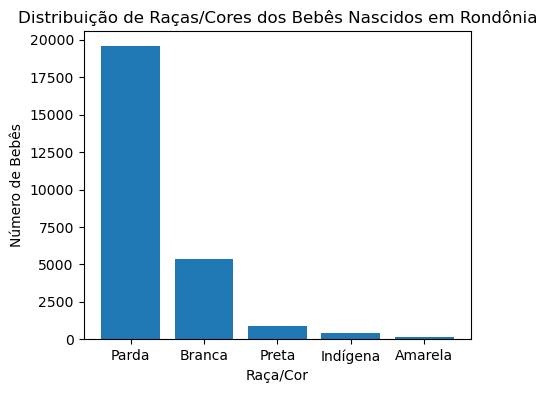

In [158]:
racacor = sinasc_raw['RACACOR'].value_counts()

fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(racacor.index, racacor)

ax.set_title('Distribuição de Raças/Cores dos Bebês Nascidos em Rondônia')
ax.set_xlabel('Raça/Cor')
ax.set_ylabel('Número de Bebês')

plt.show()

In [159]:
df_gravidez = sinasc_raw.groupby('munResNome')['GRAVIDEZ'].value_counts()
df_gravidez


munResNome               GRAVIDEZ
Alta Floresta D'Oeste    Única        359
                         Dupla          6
Alto Alegre dos Parecis  Única        152
                         Dupla          2
Alto Paraíso             Única        224
                                     ... 
Vale do Anari            Dupla          1
Vale do Paraíso          Única         79
                         Dupla          1
Vilhena                  Única       1549
                         Dupla         39
Name: GRAVIDEZ, Length: 95, dtype: int64

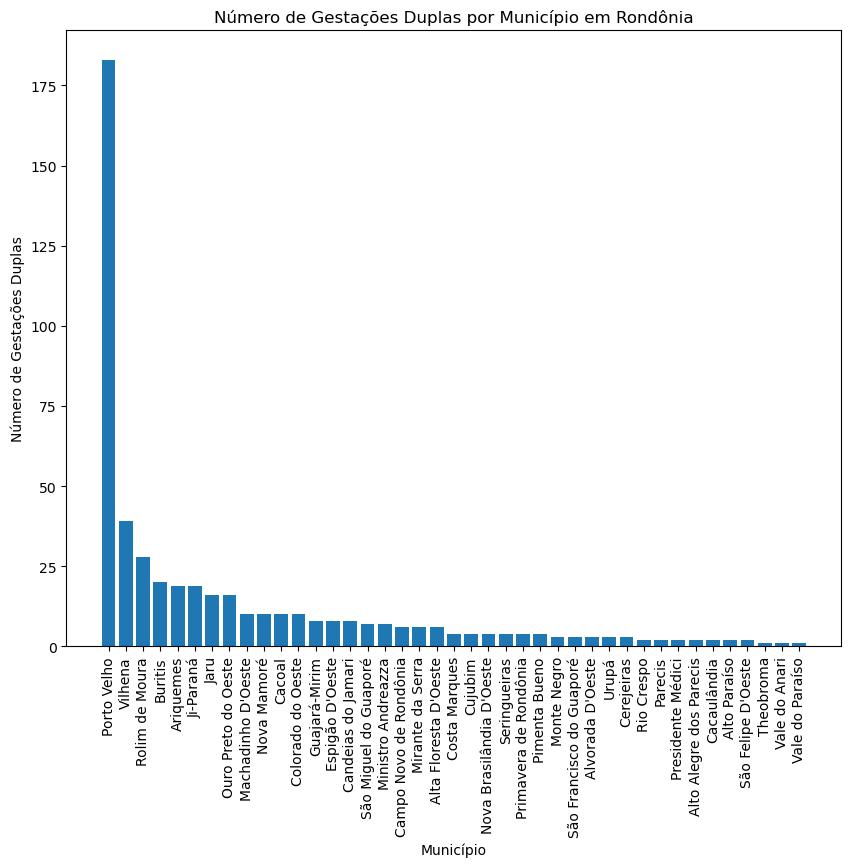

In [160]:
# Conta o número de gestações duplas em cada município
duplo = sinasc_raw[sinasc_raw['GRAVIDEZ'] == 'Dupla']['munResNome'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(duplo.index, duplo)

ax.set_title('Número de Gestações Duplas por Município em Rondônia')
ax.set_xlabel('Município')
ax.set_ylabel('Número de Gestações Duplas')

plt.xticks(rotation=90)

plt.show()

In [161]:
sinasc_raw.groupby('munResNome')['PARTO'].value_counts()

munResNome               PARTO  
Alta Floresta D'Oeste    Cesáreo     295
                         Vaginal      70
Alto Alegre dos Parecis  Cesáreo     124
                         Vaginal      30
Alto Paraíso             Cesáreo     169
                                    ... 
Vale do Anari            Vaginal      32
Vale do Paraíso          Cesáreo      59
                         Vaginal      21
Vilhena                  Cesáreo    1199
                         Vaginal     391
Name: PARTO, Length: 105, dtype: int64

In [162]:
df_parto = sinasc_raw.groupby('munResNome')['PARTO'].value_counts().unstack().fillna(0)
df_parto['total'] = df_parto.sum(axis=1)
df_parto['Porcentagem Cesáreo'] = df_parto['Cesáreo'] / df_parto['total'] * 100
df_parto['Porcentage, Vaginal'] = df_parto['Vaginal'] / df_parto['total'] * 100

In [163]:
df_parto.sort_values('Porcentagem Cesáreo', ascending=False).head(20)


PARTO,Cesáreo,Vaginal,total,Porcentagem Cesáreo,"Porcentage, Vaginal"
munResNome,,,,,
Primavera de Rondônia,40.0,3.0,43.0,93.023256,6.976744
Rolim de Moura,835.0,91.0,926.0,90.172786,9.827214
Novo Horizonte do Oeste,88.0,10.0,98.0,89.795918,10.204082
São Felipe D'Oeste,48.0,6.0,54.0,88.888889,11.111111
Nova Brasilândia D'Oeste,231.0,30.0,261.0,88.505747,11.494253
Santa Luzia D'Oeste,87.0,12.0,99.0,87.878788,12.121212
São Miguel do Guaporé,306.0,46.0,352.0,86.931818,13.068182
Ministro Andreazza,73.0,11.0,84.0,86.904762,13.095238
Parecis,38.0,6.0,44.0,86.363636,13.636364


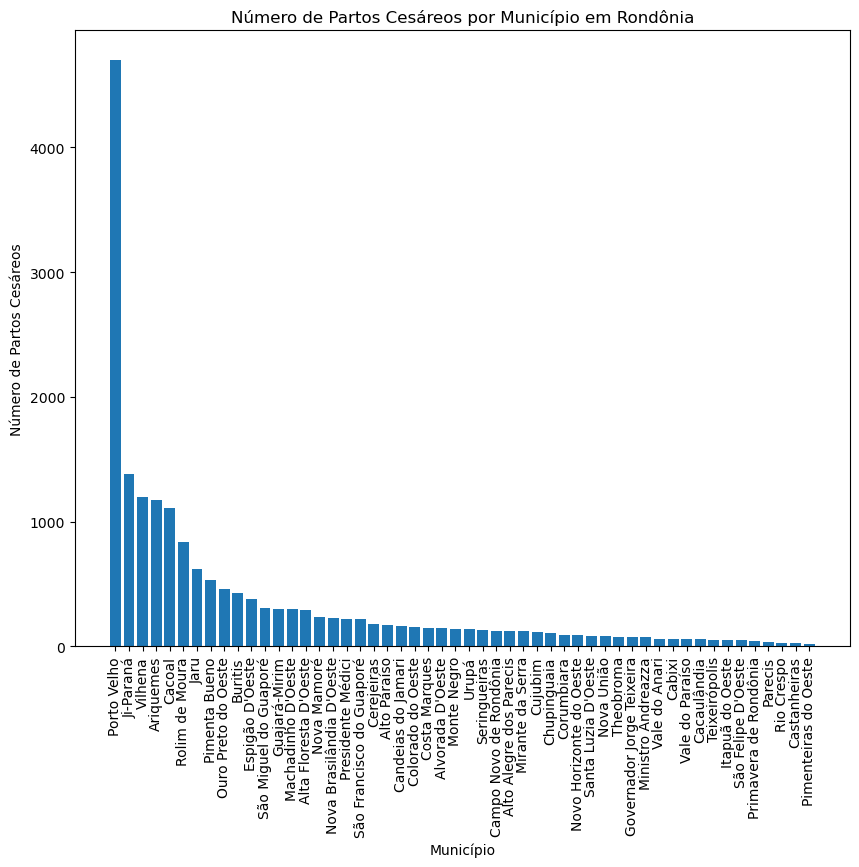

In [164]:
# Conta o número de partos cesáreos em cada município
cesáreo = sinasc_raw[sinasc_raw['PARTO'] == 'Cesáreo']['munResNome'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(cesáreo.index, cesáreo)

ax.set_title('Número de Partos Cesáreos por Município em Rondônia')
ax.set_xlabel('Município')
ax.set_ylabel('Número de Partos Cesáreos')

plt.xticks(rotation=90)

plt.show()

<Axes: title={'center': 'Distribuição de nascimentos por tipo de parto nas cidades de Rondônia'}, xlabel='munResNome'>

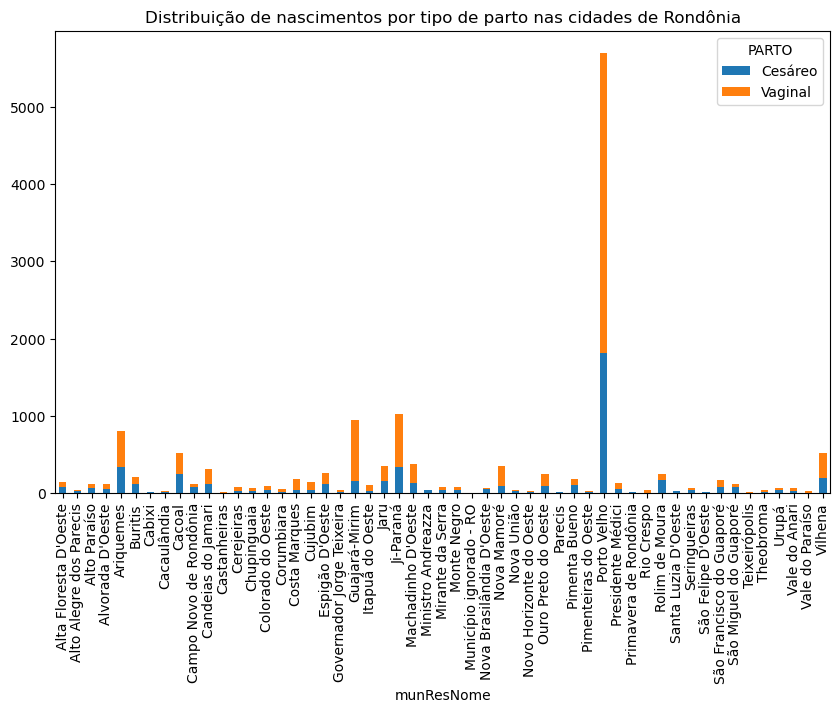

In [165]:

# Cria uma tabela pivô mostrando a contagem de nascimentos por tipo de parto e cidade
parto_pivot = pd.pivot_table(sinasc_raw, index='munResNome', columns='PARTO', values='QTDPARTNOR', aggfunc='sum', fill_value=0)

# Calcula a proporção de nascimentos por tipo de parto em todo o estado
parto_proporcao = parto_pivot.sum() / parto_pivot.sum().sum()

# Cria um gráfico de barras para comparar a distribuição de nascimentos por tipo de parto nas cidades
parto_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), title='Distribuição de nascimentos por tipo de parto nas cidades de Rondônia')


In [166]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Inicialmente, é importante destacar que a análise dos dados apresentados requer cautela e atenção aos detalhes para evitar interpretações equivocadas.

* No entanto, considerando as informações apresentadas, é possível notar que a idade média das mães e dos pais ficou abaixo dos 30 e 40 anos, respectivamente, em todas as cidades analisadas. Isso pode indicar que, para vender produtos destinados a pais e mães de primeira viagem, é importante focar na faixa etária de 20 a 35 anos, o que pode reduzir os custos de marketing.

* Além disso também é possível notar que durante a análise do dia 8 de Janeiro (meu aniversário), houve um aumento significativo de peso nos bebês nascidos de mães com escolaridade entre 8 e 11 anos de estudo. Pode-se dizer que mães mais jovens tiveram seus filhos nesse dia ou mães menos estudadas.

* É possível observar uma relação entre a Faixa de escolaridade da mãe e o peso do recém-nascido. Por exemplo, bebês de mães entre 12 anos ou mais de estudo apresentam um peso médio maior em comparação com bebês de mães na Faixa de escolaridade de 1 a 3 anos.

* É interessante notar que o município com menor número de nascimentos apresentou apenas 32 nascimentos registrados, o que pode indicar baixa taxa de natalidade nessa região.

* O município de Porto Velho se destaca pelo maior número de nascimentos registrados, mas também apresenta uma baixa média de filhos vivos por família, indicando talvez uma tendência a famílias menores nessa região.

* A idade máxima dos pais no município de Porto Velho foi de 65 anos, o que pode indicar um aumento na paternidade tardia nessa região. É importante destacar que essa informação deve ser interpretada com cautela, pois não sabemos a representatividade desse caso específico em relação à população em geral.

* A Predominância da cor parda no estado de Rondônia

* Cidade que tem mais partos cesáreos do que vaginais pode indicar uma alta taxa de intervenção médica desnecessária durante o parto, o que pode aumentar os riscos de complicações para a mãe e para o bebê. Foi o caso de algumas cidades como: 
    - Primavera de Rondônia com 93,02% de Cesáreos
    - Rolim de Moura com 90% 
    - Novo Horizonte do Oeste com 89,79%
    - Nova Brasilândia D'Oeste com 88,88% 
    - São Felipe D'Oeste 88,5%
  
   Principalmente em Rolim de Moura onde a quantidade de partos foi elevada.
